# Retrieving Bubble Tea Shops in NYC Using Yelp Fusion API

Mark Bauer

In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from decouple import AutoConfig

In [2]:
# API only returns 1,000 results and 50 per request
# we use the offset parameter to page through to the next 50
# source: https://www.yelp.com/developers/faq

# saving my api key as an environment variable
API_KEY = os.environ.get('YELP_API')
if API_KEY is None:
    config = AutoConfig(search_path = '.')
    API_KEY = config('YELP_API')

# empty list to place our data for each page
lst = []

# our offset parameter - each page 50 rows
offset = 0
print('initial offset number: {}'.format(offset))

# loop through the api 20 times (limit is 1000 rows with each page includes 50 rows)
for i in range(20):
    
    try:
        headers = {'Authorization': 'Bearer {}'.format(API_KEY)}
        search_api_url = 'https://api.yelp.com/v3/businesses/search'
        params = {
                  'term': 'bubble tea', 
                  'categories': 'bubbletea, boba',
                  'location': 'New York City',
                  'offset': offset,
                  'limit': 50}

        response = requests.get(search_api_url, 
                                headers=headers, 
                                params=params, 
                                timeout=10)

        # return a dictionary
        data_dict = response.json()
        
        # convert the business dictionary to a pandas dataframe
        data = pd.DataFrame(data_dict['businesses'])
        # append dataframe to list
        lst.append(data)
      
        # add 50 to the offset to access a new page
        offset += 50
        print('current offset number: {}'.format(offset))
        
    except Exception as ex:
        print('exception: {}\nexit loop.'.format(ex))
        break

# concatenate all pages to one dataframe
df = pd.concat(lst)
df = df.reset_index(drop=True)

rows, columns = df.shape
print()
print('query includes {:,} rows and {} columns.'.format(rows, columns))
print('row id is unique: {}.'.format(df['id'].is_unique))

if df['id'].is_unique == False:
    duplicates = df.loc[df.duplicated(subset=['id'])]
    vals = list(duplicates.head()['name'].values)
    print('\nduplicates found: {}.'.format(vals))
    
    df = df.drop_duplicates(subset=['id']).reset_index(drop=True)
    print('dropping duplicates...')
    
    rows, columns = df.shape
    print('\nrow id is unique: {}.'.format(df['id'].is_unique))
    print('query includes {:,} rows and {} columns.'.format(rows, columns))

initial offset number: 0


current offset number: 50


current offset number: 100


current offset number: 150


current offset number: 200


current offset number: 250


current offset number: 300


current offset number: 350


current offset number: 400


current offset number: 450


current offset number: 500


current offset number: 550


current offset number: 600


current offset number: 650


current offset number: 700


current offset number: 750


current offset number: 800


current offset number: 850


current offset number: 900


current offset number: 950


current offset number: 1000

query includes 543 rows and 16 columns.
row id is unique: False.

duplicates found: ['Tea Time', 'Drunk Tea'].
dropping duplicates...

row id is unique: True.
query includes 541 rows and 16 columns.


In [3]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,73,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]","{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,NaN
1,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,97,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]","{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,$$
2,Pb5WVn8D5Xj26zpc9PutUw,wanpo-tea-shop-new-york-3,Wanpo Tea Shop,https://s3-media2.fl.yelpcdn.com/bphoto/nGx1Qx...,False,https://www.yelp.com/biz/wanpo-tea-shop-new-yo...,29,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.73155209065394, 'longitude': -...","[delivery, pickup]","{'address1': '37 E 8th St', 'address2': '', 'a...",+12129958349,(212) 995-8349,2903.009527,$$
3,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,85,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]","{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370,$$
4,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,29,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]","{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,$$


In [4]:
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
536,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],"{'address1': '37-11 Main St', 'address2': '', ...",,,15147.410738,NaN
537,2_TEOFG1P_wz9ZRbkggJZg,hummus-grill-edison,Hummus Grill,https://s3-media1.fl.yelpcdn.com/bphoto/s308l1...,False,https://www.yelp.com/biz/hummus-grill-edison?a...,28,"[{'alias': 'mediterranean', 'title': 'Mediterr...",3.0,"{'latitude': 40.5481840840451, 'longitude': -7...","[delivery, pickup]","{'address1': '55 Parsonage Rd', 'address2': ''...",,,33625.610011,$
538,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,T Baar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],"{'address1': '135-36 40th Rd', 'address2': '',...",,,15045.970192,$
539,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],"{'address1': '122 Mulberry St', 'address2': No...",+12129666206,(212) 966-6206,1414.238245,NaN
540,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],"{'address1': '135-24 40th Rd', 'address2': '',...",+17188869200,(718) 886-9200,14997.842205,$


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             541 non-null    object 
 1   alias          541 non-null    object 
 2   name           541 non-null    object 
 3   image_url      541 non-null    object 
 4   is_closed      541 non-null    bool   
 5   url            541 non-null    object 
 6   review_count   541 non-null    int64  
 7   categories     541 non-null    object 
 8   rating         541 non-null    float64
 9   coordinates    541 non-null    object 
 10  transactions   541 non-null    object 
 11  location       541 non-null    object 
 12  phone          541 non-null    object 
 13  display_phone  541 non-null    object 
 14  distance       541 non-null    float64
 15  price          327 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 64.1+ KB


In [6]:
df['name'].value_counts()

Gong Cha                       36
Kung Fu Tea                    34
ViVi Bubble Tea                21
Möge Tee                       10
CoCo Fresh Tea & Juice          8
                               ..
Taiyaki NYC - Williamsburg      1
ABC Eats Food Hall              1
Cocohodo                        1
Gong Cha - Ridgewood            1
Maxin's Cafe                    1
Name: name, Length: 361, dtype: int64

In [7]:
df['name'].value_counts().head(20)

Gong Cha                       36
Kung Fu Tea                    34
ViVi Bubble Tea                21
Möge Tee                       10
CoCo Fresh Tea & Juice          8
Coco Fresh Tea & Juice          6
Vivi Bubble Tea                 6
Tiger Sugar                     5
Real Fruit Bubble Tea           4
Banhmigos                       4
Chun Yang Tea                   4
Hawa Smoothies & Bubble Tea     4
TBaar                           4
Teazzi Tea Shop                 3
Yaya Tea Garden                 3
Meet Fresh                      3
Yi Fang Taiwan Fruit Tea        3
Jupioca                         3
Waffle & Bubble                 3
Mr. Wish                        3
Name: name, dtype: int64

In [8]:
df['categories'][0]

[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]

In [9]:
gdf = pd.concat([df, df['coordinates'].apply(pd.Series)], axis=1)

gdf = gpd.GeoDataFrame(gdf, crs=4326, 
      geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))

gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude,longitude,geometry
0,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,73,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]","{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,NaN,40.728800,-73.987750,POINT (-73.98775 40.72880)
1,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,97,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]","{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,$$,40.719174,-73.996220,POINT (-73.99622 40.71917)
2,Pb5WVn8D5Xj26zpc9PutUw,wanpo-tea-shop-new-york-3,Wanpo Tea Shop,https://s3-media2.fl.yelpcdn.com/bphoto/nGx1Qx...,False,https://www.yelp.com/biz/wanpo-tea-shop-new-yo...,29,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.73155209065394, 'longitude': -...","[delivery, pickup]","{'address1': '37 E 8th St', 'address2': '', 'a...",+12129958349,(212) 995-8349,2903.009527,$$,40.731552,-73.994160,POINT (-73.99416 40.73155)
3,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,85,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]","{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370,$$,40.716170,-73.997100,POINT (-73.99710 40.71617)
4,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,29,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]","{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,$$,40.720597,-73.984539,POINT (-73.98454 40.72060)


In [10]:
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
boro_gdf = gpd.read_file(url)

boro_gdf.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366208e+08,359993.127161,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187194e+09,463868.935588,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934174e+09,728195.194837,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
3,5.0,Staten Island,1.623631e+09,325924.002252,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
4,4.0,Queens,3.040206e+09,900269.281914,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


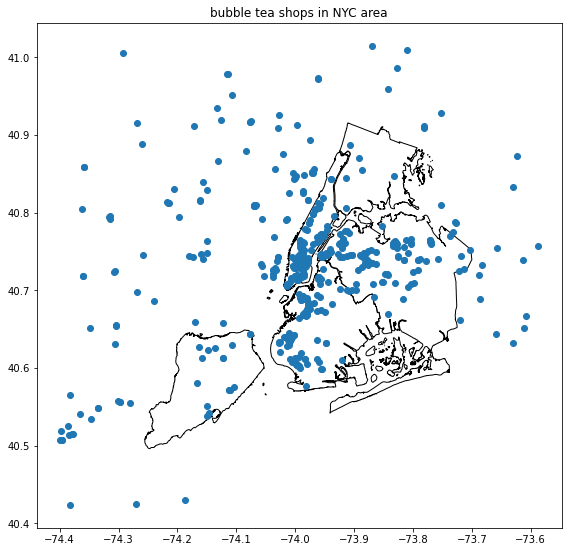

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC area')
plt.tight_layout()

In [12]:
gdf = gpd.clip(gdf, boro_gdf)
gdf = gdf.reset_index(drop=True)

gdf.shape

C:\Users\datal\AppData\Local\Temp\ipykernel_80852\2316523936.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  gdf = gpd.clip(gdf, boro_gdf)


(403, 19)

In [13]:
gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude,longitude,geometry
0,BLnq_CETaoJYQB7U3IxGCw,mr-chicken-and-mrs-tea-ozone-park,Mr.Chicken & Mrs.Tea,https://s3-media2.fl.yelpcdn.com/bphoto/QLxNJs...,False,https://www.yelp.com/biz/mr-chicken-and-mrs-te...,96,"[{'alias': 'chicken_wings', 'title': 'Chicken ...",4.5,"{'latitude': 40.6698487, 'longitude': -73.8423...","[pickup, delivery]","{'address1': '150-29 Crossbay Blvd', 'address2...",+13475350010,(347) 535-0010,13456.986110,NaN,40.669849,-73.842308,POINT (-73.84231 40.66985)
1,1IwCoN9jVu4O-jaeEKH83w,halo-kitchen-and-lounge-queens,Halo Kitchen & Lounge,https://s3-media2.fl.yelpcdn.com/bphoto/s7DKo7...,False,https://www.yelp.com/biz/halo-kitchen-and-loun...,12,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",2.5,"{'latitude': 40.68871402307153, 'longitude': -...","[delivery, pickup]","{'address1': '12710 Liberty Ave', 'address2': ...",+19293860928,(929) 386-0928,15021.671634,NaN,40.688714,-73.817481,POINT (-73.81748 40.68871)
2,j5x37Ozo9hc3--zdMnZfEA,pop-pot-noodle-and-tea-spot-queens-2,Pop Pot Noodle & Tea Spot,https://s3-media2.fl.yelpcdn.com/bphoto/SDb9ck...,False,https://www.yelp.com/biz/pop-pot-noodle-and-te...,16,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.69123, 'longitude': -73.86614}","[pickup, delivery]","{'address1': '7508 Jamaica Ave', 'address2': N...",,,10916.154176,NaN,40.691230,-73.866140,POINT (-73.86614 40.69123)
3,AQqUiXi0hn1xu5qVfM54IQ,beijing-dumpling-house-jamaica,Beijing Dumpling House,https://s3-media3.fl.yelpcdn.com/bphoto/w93mGy...,False,https://www.yelp.com/biz/beijing-dumpling-hous...,332,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7043147, 'longitude': -73.8091...","[pickup, delivery]","{'address1': '88-38 Sutphin Blvd', 'address2':...",+17182972935,(718) 297-2935,15613.386874,$,40.704315,-73.809180,POINT (-73.80918 40.70431)
4,-E5PfobEXNQ_WC8Qv2wGJA,halal-china-kitchen-plus-jamaica,Halal China Kitchen Plus,https://s3-media4.fl.yelpcdn.com/bphoto/lnj0lA...,False,https://www.yelp.com/biz/halal-china-kitchen-p...,34,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.5,"{'latitude': 40.7081726, 'longitude': -73.8032...","[delivery, pickup]","{'address1': '87-48 Parsons Blvd', 'address2':...",+17185261300,(718) 526-1300,16108.411529,NaN,40.708173,-73.803248,POINT (-73.80325 40.70817)


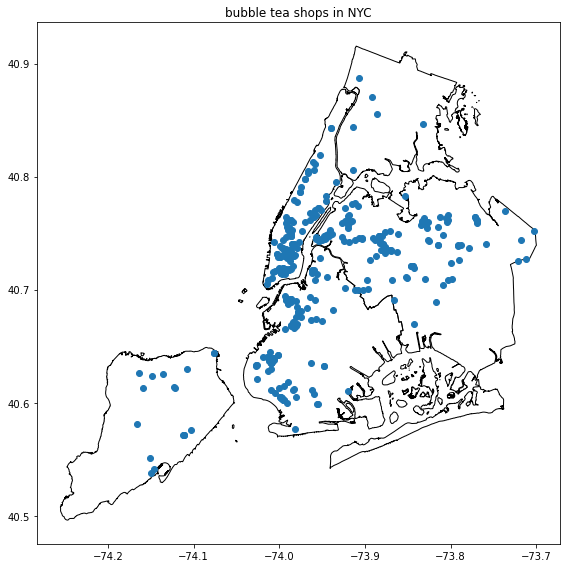

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC')
plt.tight_layout()

In [15]:
# # save file
# gdf.to_csv('boba-nyc.csv', index=False)

In [16]:
# # sanity check
# pd.read_csv('boba-nyc.csv').head()